In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

victoria sc
new norfolk au
jalu ly
cape town za
port elizabeth za
mount gambier au
vaitupu wf
ushuaia ar
bredasdorp za
tiksi ru
tiksi ru
sand no
hithadhoo mv
verkhnetulomskiy ru
busselton au
hermanus za
norman wells ca
gamba ga
ulladulla au
busselton au
bredasdorp za
ouallam ne
lappeenranta fi
rabaul pg
taolanaro mg
mataura pf
vaini to
chagda ru
taolanaro mg
jamestown sh
rikitea pf
saint-philippe re
jamestown sh
messina za
geraldton au
bethel us
yulara au
dubovskoye ru
bella union uy
purnia in
chokurdakh ru
carnarvon au
rikitea pf
dutlwe bw
carnarvon au
victoria sc
russell nz
samusu ws
albany au
thompson ca
rikitea pf
attawapiskat ca
jamestown sh
itoman jp
saint george bm
airai pw
seoul kr
ushuaia ar
parangan ph
dikson ru
bluff nz
lebu cl
upernavik gl
puerto ayora ec
talnakh ru
bambous virieux mu
cape town za
busselton au
mataura pf
kapaa us
srednekolymsk ru
nikolskoye ru
flinders au
jamestown sh
belushya guba ru
victoria sc
codrington ag
nanakuli us
yellowknife ca
kapaa us
nikolskoye 

cape town za
idrinskoye ru
samarai pg
provideniya ru
nybro se
constitucion mx
atuona pf
saskylakh ru
avarua ck
luderitz na
atuona pf
jaca es
busselton au
bereznik ru
berlevag no
kapaa us
hobart au
mataura pf
toliary mg
bangassou cf
bluff nz
vrangel ru
nikolskoye ru
punta arenas cl
hami cn
raudeberg no
atar mr
vaini to
hilo us
avarua ck
belushya guba ru
langsa id
luderitz na
port alfred za
pangody ru
port elizabeth za
lorengau pg
busselton au
hilo us
mataura pf
avarua ck
roberto payan co
kaitangata nz
makaryev ru
hamilton bm
aswan eg
pevek ru
barrow us
coruripe br
attawapiskat ca
hermanus za
ushuaia ar
hovd mn
jalu ly
turukhansk ru
tiarei pf
ushuaia ar
saint-philippe re
pedasi pa
mankono ci
busselton au
sitka us
kosa ru
sao joao da barra br
puerto baquerizo moreno ec
avarua ck
higuey do
khani ru
illoqqortoormiut gl
hermanus za
saint-laurent-du-var fr
cayenne gf
kapaa us
attawapiskat ca
krasnoselkup ru
bredasdorp za
rikitea pf
acapulco mx
bredasdorp za
nouadhibou mr
qaanaaq gl
taolanaro 

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8efb80f723fdd3a9d1d159808deb0f38


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | victoria
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | jalu
Processing Record 4 of Set 13 | cape town
Processing Record 5 of Set 13 | port elizabeth
Processing Record 6 of Set 13 | mount gambier
Processing Record 7 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | bredasdorp
Processing Record 10 of Set 13 | tiksi
Processing Record 11 of Set 13 | sand
Processing Record 12 of Set 13 | hithadhoo
Processing Record 13 of Set 13 | verkhnetulomskiy
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | hermanus
Processing Record 16 of Set 13 | norman wells
Processing Record 17 of Set 13 | gamba
Processing Record 18 of Set 13 | ulladulla
Processing Record 19 of Set 13 | ouallam
Processing Record 20 of Set 13 | lappeenranta
Processing Record 21 of Set 13 | rabaul
Processing Record 22 of Set 13 | taolanaro
City not found. Skipping...
Processing 

Processing Record 35 of Set 16 | sao filipe
Processing Record 36 of Set 16 | pratapgarh
Processing Record 37 of Set 16 | wazzan
City not found. Skipping...
Processing Record 38 of Set 16 | los banos
Processing Record 39 of Set 16 | arraial do cabo
Processing Record 40 of Set 16 | yaan
Processing Record 41 of Set 16 | boende
Processing Record 42 of Set 16 | aykhal
Processing Record 43 of Set 16 | qeshm
Processing Record 44 of Set 16 | sola
Processing Record 45 of Set 16 | guerrero negro
Processing Record 46 of Set 16 | fukue
Processing Record 47 of Set 16 | sampit
Processing Record 48 of Set 16 | kargopol
Processing Record 49 of Set 16 | herat
Processing Record 50 of Set 16 | severo-kurilsk
Processing Record 1 of Set 17 | ganzhou
Processing Record 2 of Set 17 | tiznit
Processing Record 3 of Set 17 | christchurch
Processing Record 4 of Set 17 | kaabong
Processing Record 5 of Set 17 | kodiak
Processing Record 6 of Set 17 | samana
Processing Record 7 of Set 17 | arima
Processing Record 8 o

Processing Record 18 of Set 20 | kenora
Processing Record 19 of Set 20 | sur
Processing Record 20 of Set 20 | sorland
Processing Record 21 of Set 20 | ayagoz
Processing Record 22 of Set 20 | dauphin
Processing Record 23 of Set 20 | dawei
Processing Record 24 of Set 20 | llata
Processing Record 25 of Set 20 | lakes entrance
Processing Record 26 of Set 20 | makhinjauri
Processing Record 27 of Set 20 | vermilion
Processing Record 28 of Set 20 | benguela
Processing Record 29 of Set 20 | voh
Processing Record 30 of Set 20 | ilulissat
Processing Record 31 of Set 20 | flin flon
Processing Record 32 of Set 20 | westport
Processing Record 33 of Set 20 | rungata
City not found. Skipping...
Processing Record 34 of Set 20 | velikie luki
City not found. Skipping...
Processing Record 35 of Set 20 | cabo san lucas
Processing Record 36 of Set 20 | ust-kut
Processing Record 37 of Set 20 | mokhsogollokh
Processing Record 38 of Set 20 | idrinskoye
Processing Record 39 of Set 20 | samarai
Processing Recor

Processing Record 1 of Set 24 | gazanjyk
Processing Record 2 of Set 24 | bambanglipuro
Processing Record 3 of Set 24 | jambol
City not found. Skipping...
Processing Record 4 of Set 24 | kieta
Processing Record 5 of Set 24 | san marcos
Processing Record 6 of Set 24 | gorom-gorom
Processing Record 7 of Set 24 | launceston
Processing Record 8 of Set 24 | burnie
Processing Record 9 of Set 24 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 24 | jiamusi
Processing Record 11 of Set 24 | thinadhoo
Processing Record 12 of Set 24 | khlung
Processing Record 13 of Set 24 | san patricio
Processing Record 14 of Set 24 | karpuninskiy
City not found. Skipping...
Processing Record 15 of Set 24 | dunedin
Processing Record 16 of Set 24 | beira
Processing Record 17 of Set 24 | biltine
Processing Record 18 of Set 24 | josanicka banja
Processing Record 19 of Set 24 | vorukh
Processing Record 20 of Set 24 | dongning
Processing Record 21 of Set 24 | ojinaga
Processing Record 22 of Set 24 | 

In [13]:
city_data

[{'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.03,
  'Max Temp': 78.53,
  'Humidity': 76,
  'Cloudiness': 1,
  'Wind Speed': 21.14,
  'Country': 'PF',
  'Date': '2020-10-01 19:19:22'},
 {'City': 'Poopo',
  'Lat': -18.37,
  'Lng': -66.97,
  'Max Temp': 66.2,
  'Humidity': 39,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'BO',
  'Date': '2020-10-01 19:19:23'},
 {'City': 'Barrow',
  'Lat': 71.29,
  'Lng': -156.79,
  'Max Temp': 33.8,
  'Humidity': 92,
  'Cloudiness': 90,
  'Wind Speed': 17.22,
  'Country': 'US',
  'Date': '2020-10-01 19:19:23'},
 {'City': 'Severo-Kurilsk',
  'Lat': 50.68,
  'Lng': 156.12,
  'Max Temp': 47.52,
  'Humidity': 86,
  'Cloudiness': 100,
  'Wind Speed': 10.67,
  'Country': 'RU',
  'Date': '2020-10-01 19:19:23'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 80.01,
  'Humidity': 73,
  'Cloudiness': 1,
  'Wind Speed': 8.05,
  'Country': 'US',
  'Date': '2020-10-01 19:19:24'},
 {'City': 'Kingsport',
  'Lat': 36.55,
  'Lng': -82.56,


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,78.53,76,1,21.14,PF,2020-10-01 19:19:22
1,Poopo,-18.37,-66.97,66.20,39,40,8.05,BO,2020-10-01 19:19:23
2,Barrow,71.29,-156.79,33.80,92,90,17.22,US,2020-10-01 19:19:23
3,Severo-Kurilsk,50.68,156.12,47.52,86,100,10.67,RU,2020-10-01 19:19:23
4,Kapaa,22.08,-159.32,80.01,73,1,8.05,US,2020-10-01 19:19:24
5,Kingsport,36.55,-82.56,71.01,56,40,10.29,US,2020-10-01 19:18:04
6,Kaduqli,11.02,29.72,76.32,71,0,3.42,SD,2020-10-01 19:19:24
7,Elizabeth City,36.29,-76.25,79.00,54,1,5.84,US,2020-10-01 19:19:24
8,Kungurtug,50.60,97.52,25.14,93,100,4.59,RU,2020-10-01 19:19:25
9,Matadi,-5.82,13.45,81.91,60,31,8.77,CD,2020-10-01 19:19:25


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

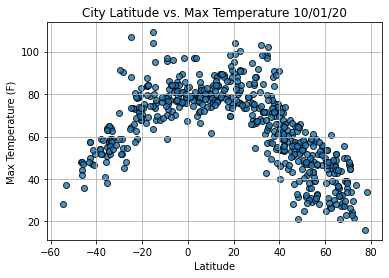

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

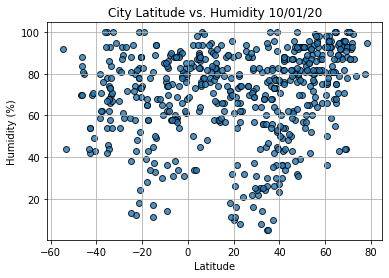

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

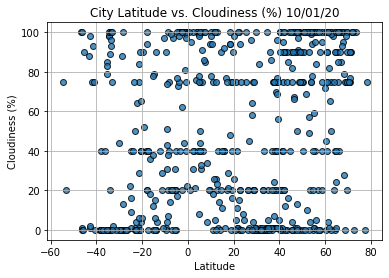

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

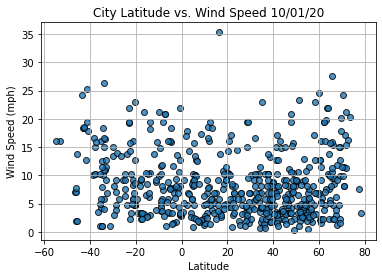

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                     Yar-Sale
Lat                         66.83
Lng                         70.83
Max Temp                    43.88
Humidity                       88
Cloudiness                    100
Wind Speed                   8.41
Country                        RU
Date          2020-10-01 19:19:28
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
558    False
559     True
560     True
561    False
562     True
Name: Lat, Length: 563, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Barrow,71.29,-156.79,33.80,92,90,17.22,US,2020-10-01 19:19:23
3,Severo-Kurilsk,50.68,156.12,47.52,86,100,10.67,RU,2020-10-01 19:19:23
4,Kapaa,22.08,-159.32,80.01,73,1,8.05,US,2020-10-01 19:19:24
5,Kingsport,36.55,-82.56,71.01,56,40,10.29,US,2020-10-01 19:18:04
6,Kaduqli,11.02,29.72,76.32,71,0,3.42,SD,2020-10-01 19:19:24


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

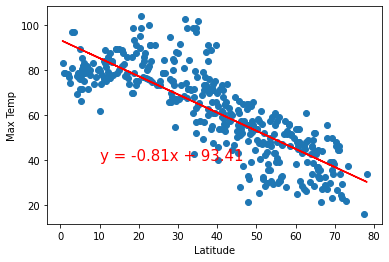

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere /n for Maximum Temperature", "Max Temp",(10,40))

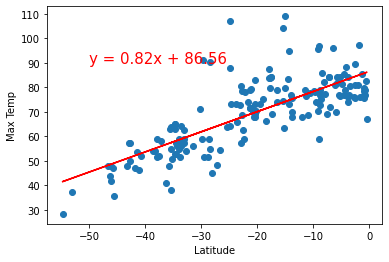

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

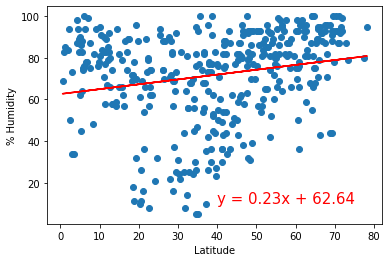

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

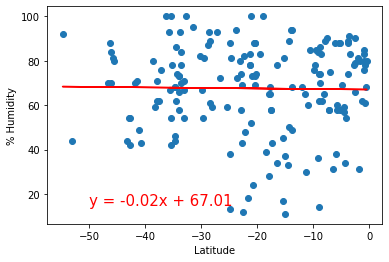

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

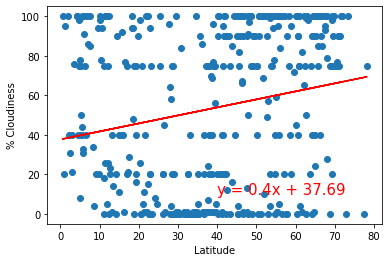

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.% 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness',(40,10))

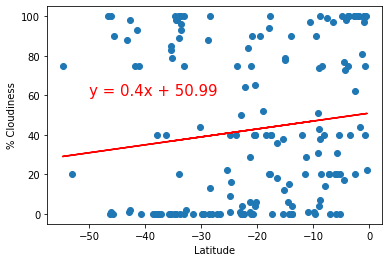

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

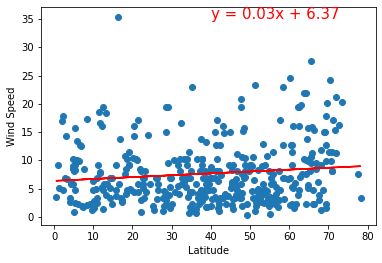

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

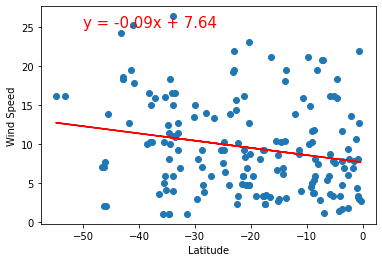

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))